In [16]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [17]:
data = pd.read_pickle("../../../data/03_training_set/training_set.pkl")
X = data.drop(['new_watchers'], axis=1)
y = data['new_watchers']
s = StandardScaler()
X = s.fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

# Wzmocnienie gradientowe

Zastosowałem dwie wersje:
- z parametrami domyślnymi dostarczonymi w scikit-learn
- z własnymi wartościami parametrów, testowane różne wersje (jedna zostawiona dla przykładu), jednak żadna z nich nie prowadziła do otrzymania wyników znacząco lepszych niż w implementacji domyślnej

In [18]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

In [22]:
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(verbose=1, learning_rate=eta)
    model.fit(X_train, y_train)
    train_results.append(model.score(X_train, y_train))
    test_results.append(model.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1         274.3677            5.30m
         2         245.4724            5.27m
         3         221.8069            5.23m
         4         215.2377            5.17m
         5         198.4462            5.12m
         6         196.2273            5.07m
         7         195.4762            5.01m
         8         194.3663            4.96m
         9         190.8304            4.91m
        10         187.4495            4.87m
        20         125.6691            4.32m
        30         120.1649            3.78m
        40         117.9411            3.23m
        50         116.1715            2.69m
        60         114.7505            2.16m
        70         112.9800            1.62m
        80         112.3423            1.08m
        90         111.9921           32.34s
       100         111.4150            0.00s
      Iter       Train Loss   Remaining Time 
         1         313.1938            5.21m
        

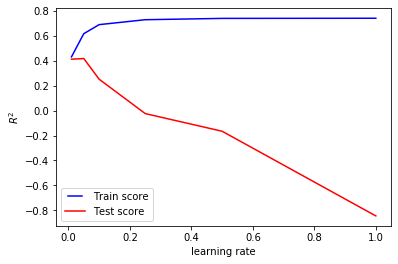

In [24]:
line1, = plt.plot(learning_rates, train_results, 'b', label='Train score')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('$R^2$')
plt.xlabel('learning rate')
plt.show()

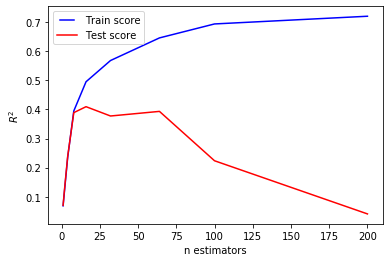

In [31]:
train_results = []
test_results = []
for estimator in n_estimators:
    model = GradientBoostingRegressor(verbose=1, n_estimators=estimator)
    model.fit(X_train, y_train)
    train_results.append(model.score(X_train, y_train))
    test_results.append(model.score(X_test, y_test))
line1, = plt.plot(n_estimators, train_results, 'b', label='Train score')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('$R^2$')
plt.xlabel('n estimators')
plt.show()

      Iter       Train Loss   Remaining Time 
         1         428.0431            2.02m
         2         426.7229            1.90m
         3         425.6466            1.93m
         4         424.7749            1.91m
         5         424.0640            1.88m
         6         423.4881            1.89m
         7         423.0187            1.86m
         8         422.6349            1.82m
         9         422.2938            1.80m
        10         422.0100            1.77m
        20         420.4947            1.55m
        30         419.5955            1.36m
        40         418.8699            1.16m
        50         418.2403           57.46s
        60         417.6840           45.83s
        70         417.1808           34.25s
        80         416.7168           22.71s
        90         416.2904           11.31s
       100         415.8957            0.00s
      Iter       Train Loss   Remaining Time 
         1         412.2803            3.61m
        

         2         319.1988           13.36m
         3         279.1444           13.22m
         4         246.6978           13.14m
         5         220.4083           13.02m
         6         199.1552           12.87m
         7         181.9364           12.74m
         8         167.9854           12.61m
         9         156.6836           12.46m
        10         147.5239           12.33m
        20         112.9786           10.65m
        30         108.6936           10.02m
        40         108.0971            9.10m
        50         108.0127            7.79m
        60         107.9999            6.37m
        70         107.9939            4.86m
        80         107.9894            3.29m
        90         107.9871            1.66m
       100         107.9847            0.00s
      Iter       Train Loss   Remaining Time 
         1         368.6015           13.49m
         2         319.1334           13.33m
         3         279.0588           13.19m
         

         4         246.4564           13.07m
         5         220.1453           12.94m
         6         198.8333           12.81m
         7         181.5705           12.69m
         8         167.5876           12.57m
         9         156.2615           12.43m
        10         147.0873           12.29m
        20         112.7307           10.92m
        30         108.5536            9.56m
        40         108.0457            8.02m
        50         107.9840            6.56m
        60         107.9765            5.18m
        70         107.9756            3.85m
        80         107.9755            2.55m
        90         107.9755            1.27m
       100         107.9755            0.00s
      Iter       Train Loss   Remaining Time 
         1         368.5500           13.50m
         2         319.0411           13.41m
         3         278.9388           13.28m
         4         246.4559           13.14m
         5         220.1448           12.99m
         

         6         198.8321           12.75m
         7         181.5694           12.62m
         8         167.5865           12.48m
         9         156.2604           12.36m
        10         147.0863           12.45m
        20         112.7304           10.98m
        30         108.5535            9.64m
        40         108.0457            8.06m
        50         107.9840            6.66m
        60         107.9765            5.24m
        70         107.9756            3.89m
        80         107.9755            2.57m
        90         107.9755            1.28m
       100         107.9755            0.00s
      Iter       Train Loss   Remaining Time 
         1         368.5499           13.56m
         2         319.0407           13.35m
         3         278.9383           13.19m
         4         246.4554           13.05m
         5         220.1442           12.93m
         6         198.8321           12.78m
         7         181.5694           12.65m
         

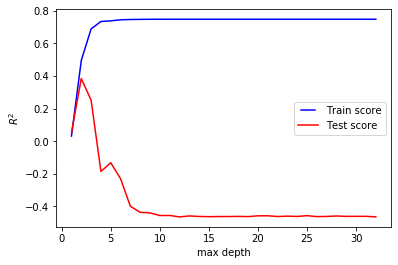

In [32]:
train_results = []
test_results = []
for depth in max_depths:
    model = GradientBoostingRegressor(verbose=1, max_depth=depth)
    model.fit(X_train, y_train)
    train_results.append(model.score(X_train, y_train))
    test_results.append(model.score(X_test, y_test))
line1, = plt.plot(max_depths, train_results, 'b', label='Train score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('$R^2$')
plt.xlabel('max depth')
plt.show()

      Iter       Train Loss   Remaining Time 
         1         427.9378            5.30m
         2         426.5102            5.30m
         3         425.3520            5.23m
         4         424.4136            5.16m
         5         423.6518            5.12m
         6         423.0344            5.07m
         7         422.5407            5.01m
         8         422.1321            4.94m
         9         420.1609            4.89m
        10         419.8665            4.82m
        20         403.3012            4.29m
        30         380.4358            3.77m
        40         360.5971            3.23m
        50         353.3112            2.69m
        60         344.3311            2.15m
        70         339.7897            1.61m
        80         337.7581            1.08m
        90         336.0948           32.23s
       100         334.0186            0.00s
      Iter       Train Loss   Remaining Time 
         1         427.9378            5.19m
        

         2         426.7229            1.74m
         3         425.6466            1.74m
         4         424.7749            1.73m
         5         424.0640            1.71m
         6         423.4881            1.70m
         7         423.0187            1.68m
         8         422.6349            1.66m
         9         422.2938            1.63m
        10         422.0100            1.62m
        20         420.4947            1.45m
        30         419.5955            1.27m
        40         418.8699            1.09m
        50         418.2403           54.39s
        60         417.6840           43.47s
        70         417.1808           32.60s
        80         416.7168           21.71s
        90         416.2904           10.84s
       100         415.8957            0.00s


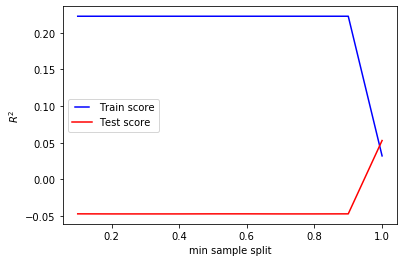

In [33]:
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = GradientBoostingRegressor(verbose=1, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    train_results.append(model.score(X_train, y_train))
    test_results.append(model.score(X_test, y_test))
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train score')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('$R^2$')
plt.xlabel('min sample split')
plt.show()

      Iter       Train Loss   Remaining Time 
         1         429.6667            4.57m
         2         429.6622            4.56m
         3         429.6585            4.58m
         4         429.6556            4.59m
         5         429.6531            4.55m
         6         429.6511            4.49m
         7         429.6495            4.45m
         8         429.6481            4.41m
         9         429.6470            4.37m
        10         429.6460            4.33m
        20         429.6411            3.82m
        30         429.6383            3.32m
        40         429.6372            2.85m
        50         429.6367            2.37m
        60         429.6364            1.89m
        70         429.6361            1.41m
        80         429.6359           56.20s
        90         429.6358           28.02s
       100         429.6356            0.00s
      Iter       Train Loss   Remaining Time 
         1         429.6702            4.07m
        

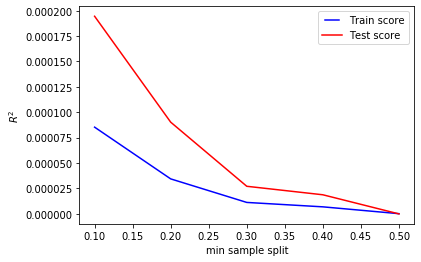

In [34]:
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingRegressor(verbose=1, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    train_results.append(model.score(X_train, y_train))
    test_results.append(model.score(X_test, y_test))

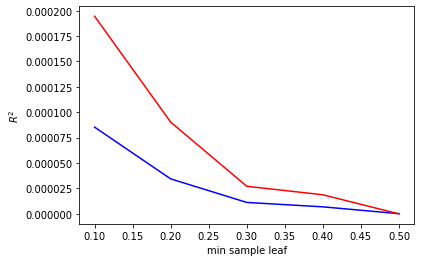

In [40]:
plt.plot(min_samples_leafs, train_results, 'b', label='Train score')
plt.plot(min_samples_leafs, test_results, 'r', label='Test score')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('$R^2$')
plt.xlabel('min sample leaf')
plt.show()

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(verbose=1, max_depth=4, min_samples_split=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1         386.6026           19.90m
         2         351.6731           20.96m
         3         323.1260           20.83m
         4         299.7783           20.54m
         5         280.5903           20.44m
         6         264.7153           20.05m
         7         246.3012           18.68m
         8         231.3504           17.19m
         9         220.2633           15.89m
        10         211.2604           14.81m
        20         159.5537            9.69m
        30         149.9805            7.46m
        40         136.5595            5.95m
        50         126.6913            4.75m
        60         121.1303            3.68m
        70         118.5573            2.69m
        80         116.4855            1.76m
        90         115.4599           52.18s
       100         114.4886            0.00s
302.46362003781525
0.7335443154272052
-0.1353268700295358


In [14]:
print(mean_squared_error(y_test, y_pred))
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

302.46362003781525
0.7335443154272052
-0.1353268700295358


In [4]:
print(mean_squared_error(y_test, y_pred_default))

NameError: name 'y_pred_default' is not defined

In [5]:
print(gbr_default.score(X_train, y_train))

0.6894046942150063

In [6]:
print(gbr_default.score(X_test, y_test))

0.2643954739177593

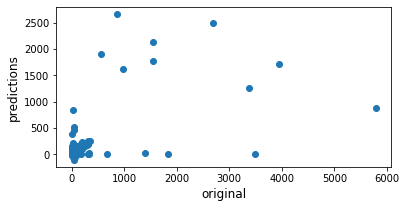

In [16]:
pred_default = gbr_default.predict(X_test).astype(int)
temp_default = y_test.values > 0
plt.scatter(y_test.values[temp_default], pred_default[temp_default])
plt.xlabel("original", fontsize=12)
plt.ylabel("predictions", fontsize=12)
plt.axis('scaled')
plt.show()

In [8]:
gbr_custom = GradientBoostingRegressor(verbose=1, 
                                       max_depth=5, 
                                       learning_rate=0.01,
                                       min_samples_split=3,
                                       n_estimators=100)
gbr_custom.fit(X_train, y_train)
y_pred_custom = gbr_custom.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1         424.6388           22.73m
         2         419.7055           23.17m
         3         414.8703           22.61m
         4         410.1314           21.80m
         5         405.4866           21.27m
         6         400.9342           20.91m
         7         396.4723           20.59m
         8         392.0992           20.27m
         9         387.8130           19.93m
        10         383.6121           19.68m
        20         345.9282           17.78m
        30         315.0355           15.69m
        40         289.5897           13.81m
        50         268.5569           11.62m
        60         251.1144            9.18m
        70         236.4238            6.60m
        80         223.8489            4.25m
        90         211.9386            2.07m
       100         201.1521            0.00s


In [9]:
mean_squared_error(y_test, y_pred_custom)

192.53966880386696

In [10]:
gbr_custom.score(X_train, y_train)

0.5318476733807187

In [11]:
gbr_custom.score(X_test, y_test)

0.27728346466167375

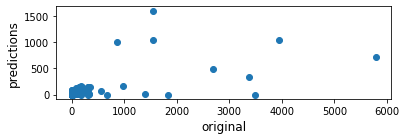

In [17]:
pred_custom = gbr_custom.predict(X_test).astype(int)
temp_custom = y_test.values > 0
plt.scatter(y_test.values[temp_custom], pred_custom[temp_custom])
plt.xlabel("original", fontsize=12)
plt.ylabel("predictions", fontsize=12)
plt.axis('scaled')
plt.show()

In [13]:
from joblib import dump
dump(gbr_default, 'gbr_default.joblib')
dump(gbr_custom, 'gbc_custom.joblib')

['gbc_custom.joblib']